# Project 1

The purpose of this notebook to document preliminary analyses of DiscGolf to average income.

DiscGolf.csv was sourced from https://www.kaggle.com/datasets/lanekatris/pdga-united-states-disc-golf-courses

postcode_level_averages was sourced from https://www.kaggle.com/datasets/hamishgunasekara/average-income-per-zip-code-usa-2018

Data joined and saved to the Resources folder as "draft_dgolf_avincome.csv"


In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from scipy.stats import linregress
import scipy.stats as st
import datetime

In [2]:
#read dataframe with county info
dgolfcountydf = pd.read_csv('Resources/dgolfcounty.csv')
dgolfcountydf.head(2)

,id_x,name_x,city,county,Area_name,State,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Lee County,"Lee County, AL",AL,USA,3,NaN,32.645412,-85.378280,36804,262.185,8240,417346,50648.78641,58963.0
1,agricultural-heritage-park,Agricultural Heritage Park,Auburn,Lee County,"Lee County, AL",AL,USA,9,NaN,32.594459,-85.492334,36830,262.185,16600,1485585,89493.07229,58963.0


In [3]:
# add region column to df
dgolfcountydf['region'] = pd.Series(dtype = 'string')
dgolfcountydf.head(2)

,id_x,name_x,city,county,Area_name,State,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome,region
0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Lee County,"Lee County, AL",AL,USA,3,NaN,32.645412,-85.378280,36804,262.185,8240,417346,50648.78641,58963.0,<NA>
1,agricultural-heritage-park,Agricultural Heritage Park,Auburn,Lee County,"Lee County, AL",AL,USA,9,NaN,32.594459,-85.492334,36830,262.185,16600,1485585,89493.07229,58963.0,<NA>


In [4]:
# add region to dataframe
northeast = ['ME','VT','NH','MA','CT','RI','NY','PA','NJ']
southeast = ['AR', 'LA', 'MS', 'AL', 'GA', 'SC', 'NC', 'VA', 'WV', 'KY', 'TN', 'FL','DE','MD']
west = ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO','AK','HI'] 
midwest = ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','OH','IN']
southwest = ['AZ','NM','OK','TX'] 

for index, row in dgolfcountydf.iterrows():
    rowstate = row['State']
    if rowstate in northeast:
        dgolfcountydf.loc[index,'region'] = 'northeast'
    elif rowstate in southeast:
        dgolfcountydf.loc[index,'region']= 'southeast'
    elif rowstate in west:
        dgolfcountydf.loc[index,'region'] = 'west'
    elif rowstate in midwest:
        dgolfcountydf.loc[index,'region'] = 'midwest'
    elif rowstate in southwest:
        dgolfcountydf.loc[index,'region'] = 'southwest'

dgolfcountydf.tail(2)

,id_x,name_x,city,county,Area_name,State,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome,region
6534,veterans-memorial-park-0,Veterans Memorial Park,Clarksburg,Harrison County,"Harrison County, WV",WV,USA,9,3.0,39.272521,-80.360143,26301,163.961,12350,627014,50770.36437,52075.0,southeast
6535,wheeling-island-marina-disc-golf-course,Wheeling Island Marina Disc Golf Course,Wheeling,Ohio County,"Ohio County, WV",WV,USA,18,1.0,40.078831,-80.736205,26003,402.069,19330,1327668,68684.32488,41312.0,southeast


# SUMMARY BY AREA (county/state)

In [5]:
areagroupdf= dgolfcountydf.groupby(['Area_name','region','State']).mean()
areagroupdf.head(2)

,,,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
Area_name,region,State,,,,,,,,,,
"Abbeville County, SC",southeast,SC,9.0,1.0,34.333338,-82.392425,29639.0,50.271,530.0,29010.0,54735.84906,47219.0
"Acadia Parish, LA",southeast,LA,9.0,2.0,30.429276,-92.320561,70535.0,95.506,7180.0,392421.0,54654.73538,45183.0


In [6]:
areagroupdftrim = areagroupdf[['holeCount', 'rating', 'PopDensity','avg_income', 'MedianHHIncome']]
areagroupdftrim

,,,holeCount,rating,PopDensity,avg_income,MedianHHIncome
Area_name,region,State,,,,,
"Abbeville County, SC",southeast,SC,9.000000,1.0,50.271,54735.849060,47219.0
"Acadia Parish, LA",southeast,LA,9.000000,2.0,95.506,54654.735380,45183.0
"Ada County, ID",west,ID,12.571429,2.4,423.772,101397.678474,73324.0
"Adair County, IA",midwest,IA,18.000000,NaN,12.514,56602.724360,55265.0
"Adair County, MO",midwest,MO,9.000000,NaN,44.639,50321.464650,49175.0
...,...,...,...,...,...,...,...
"York County, SC",southeast,SC,11.736842,3.5,380.022,64753.664882,72579.0
"York County, VA",southeast,VA,18.000000,4.0,645.036,93260.012850,91711.0
"Young County, TX",southwest,TX,9.000000,NaN,19.808,69078.302145,54569.0


In [7]:
areagroupdfcount = dgolfcountydf.groupby(['Area_name','State','region']).count()
areagroupdfcount.head(2)

,,,id_x,name_x,city,county,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
Area_name,State,region,,,,,,,,,,,,,,,
"Abbeville County, SC",SC,southeast,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Acadia Parish, LA",LA,southeast,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
areagroupdfcounttrim = areagroupdfcount[['id_x']]
areagroupdfcounttrim = areagroupdfcounttrim.rename(columns = {'id_x':"n_courses"}).copy()
areagroupdfcounttrim

,,,n_courses
Area_name,State,region,
"Abbeville County, SC",SC,southeast,1
"Acadia Parish, LA",LA,southeast,1
"Ada County, ID",ID,west,14
"Adair County, IA",IA,midwest,3
"Adair County, MO",MO,midwest,1
...,...,...,...
"York County, SC",SC,southeast,19
"York County, VA",VA,southeast,2
"Young County, TX",TX,southwest,2


In [9]:
dgolf_summary_area = pd.merge(areagroupdftrim,areagroupdfcounttrim,left_index = True,right_index=True).reset_index()
dgolf_summary_area

,Area_name,region,State,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,"Abbeville County, SC",southeast,SC,9.000000,1.0,50.271,54735.849060,47219.0,1
1,"Acadia Parish, LA",southeast,LA,9.000000,2.0,95.506,54654.735380,45183.0,1
2,"Ada County, ID",west,ID,12.571429,2.4,423.772,101397.678474,73324.0,14
3,"Adair County, IA",midwest,IA,18.000000,NaN,12.514,56602.724360,55265.0,3
4,"Adair County, MO",midwest,MO,9.000000,NaN,44.639,50321.464650,49175.0,1
...,...,...,...,...,...,...,...,...,...
1967,"York County, SC",southeast,SC,11.736842,3.5,380.022,64753.664882,72579.0,19
1968,"York County, VA",southeast,VA,18.000000,4.0,645.036,93260.012850,91711.0,2
1969,"Young County, TX",southwest,TX,9.000000,NaN,19.808,69078.302145,54569.0,2
1970,"Yuba County, CA",west,CA,21.600000,4.0,119.481,77158.362734,56278.0,5


# GROUP BY REGION

In [10]:
regiongroupdf= dgolfcountydf.groupby(['region']).mean()
regiongroupdf.head(10)


,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
region,,,,,,,,,,
midwest,12.780015,3.296844,41.955019,-90.826519,55483.748644,376.286086,7822.571650,543773.262974,65420.247144,64082.951201
northeast,14.813725,3.412969,42.060704,-74.615879,10727.156863,535.186248,7729.052288,620613.379085,76407.328392,68872.204248
southeast,14.737484,3.451841,34.559574,-83.948622,36053.506418,426.443617,10612.483954,709511.046855,63305.839864,59979.717587
southwest,13.802419,3.337838,32.764417,-99.147713,77973.282258,595.999901,11924.583333,884226.334677,68296.291555,62011.845430
west,13.806731,3.336538,41.383779,-116.294773,88791.753846,327.448230,10659.605769,799275.416346,74208.384610,70818.755769


In [11]:
regiongroupdftrim = regiongroupdf[['holeCount', 'rating', 'PopDensity','avg_income', 'MedianHHIncome']]
regiongroupdftrim

,holeCount,rating,PopDensity,avg_income,MedianHHIncome
region,,,,,
midwest,12.780015,3.296844,376.286086,65420.247144,64082.951201
northeast,14.813725,3.412969,535.186248,76407.328392,68872.204248
southeast,14.737484,3.451841,426.443617,63305.839864,59979.717587
southwest,13.802419,3.337838,595.999901,68296.291555,62011.845430
west,13.806731,3.336538,327.448230,74208.384610,70818.755769


In [12]:
regiongroupdfcount= dgolfcountydf.groupby(['region']).count()
regiongroupdfcount.head(10)

,id_x,name_x,city,county,Area_name,State,country,holeCount,rating,latitude,longitude,zipcode,PopDensity,total_pop,total_income,avg_income,MedianHHIncome
region,,,,,,,,,,,,,,,,,
midwest,2582,2582,2582,2582,2582,2582,2582,2582,1014,2582,2582,2582,2582,2582,2582,2582,2582
northeast,612,612,612,612,612,612,612,612,293,612,612,612,612,612,612,612,612
southeast,1558,1558,1558,1558,1558,1558,1558,1558,706,1558,1558,1558,1558,1558,1558,1558,1558
southwest,744,744,744,744,744,744,744,744,296,744,744,744,744,744,744,744,744
west,1040,1040,1040,1040,1040,1040,1040,1040,520,1040,1040,1040,1040,1040,1040,1040,1040


In [13]:
regiongroupdfcounttrim = regiongroupdfcount[['id_x']]
regiongroupdfcounttrim = regiongroupdfcounttrim.rename(columns = {'id_x':"n_courses"}).copy()
regiongroupdfcounttrim

,n_courses
region,
midwest,2582
northeast,612
southeast,1558
southwest,744
west,1040


In [14]:
dgolf_summary_region = pd.merge(regiongroupdftrim,regiongroupdfcounttrim,left_index = True,right_index=True).reset_index()
dgolf_summary_region

,region,holeCount,rating,PopDensity,avg_income,MedianHHIncome,n_courses
0,midwest,12.780015,3.296844,376.286086,65420.247144,64082.951201,2582
1,northeast,14.813725,3.412969,535.186248,76407.328392,68872.204248,612
2,southeast,14.737484,3.451841,426.443617,63305.839864,59979.717587,1558
3,southwest,13.802419,3.337838,595.999901,68296.291555,62011.845430,744
4,west,13.806731,3.336538,327.448230,74208.384610,70818.755769,1040


In [15]:
#dgolf_summary_region["region"] = dgolf_summary_region['region'].astype(float)

In [16]:
#dgolf_summary_region["region"] = pd.to_numeric(dgolf_summary_region['region'],errors='coerce')

ValueError: could not convert string to float: 'n_courses'

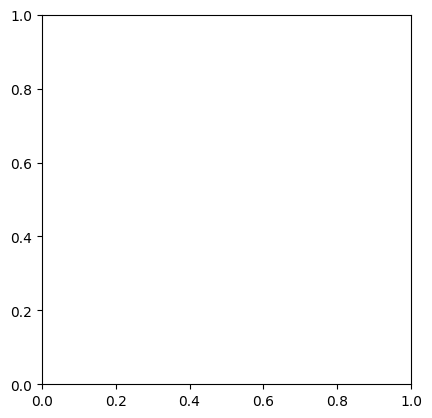

In [17]:
#label section of pie
labels=["region"]
#The value
size= ["n_courses"]
#setting colors of pie section
colors= ["Red","Green","Blue","Orange","Purple"]
plt.pie(size,labels=labels,colors=colors,autopct= "%1.1f%%",startangle=140)
#chart with equal axis
plt.axis("equal")
plt.legend()
plt.show()

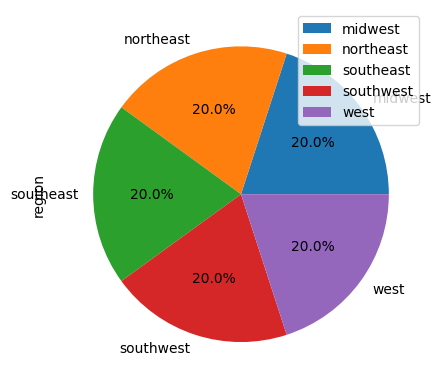

In [26]:
# Generate a pie plot showing the regions
reg_pie= dgolf_summary_region["region"].value_counts()
reg_pie.plot.pie(autopct= "%1.1f%%")
plt.legend()
plt.show()

In [18]:
#read CSV and create Pandas DataFrames
draftdf = pd.DataFrame(pd.read_csv('Resources/draft_dgolf_avincome.csv'))

In [19]:
#check df
draftdf.head(2)

,Unnamed: 0,id,name,city,state_x,zip,holeCount,rating,latitude,longitude,Modified,Comments,state_y,zipcode,total_pop,total_income,country,avg_income
0,0,adventist-discovery-park,Adventist DISCovery Park,Opelika,Alabama,36804,3,NaN,32.645412,-85.378280,no,none,AL,36804,8240,417346,USA,50648.786408
1,1,agape-disc-golf-course,Agape Disc Golf Course,Scottsboro,Alabama,35769,9,NaN,34.622819,-86.080692,no,none,AL,35769,4170,316625,USA,75929.256595


In [20]:
#mergeall.plot.(x = '',y = 'total_pop',s = 50)

In [21]:
#create summary by state:  of number of courses, total population, average income, course rating

subdraftdf = draftdf[['state_x','total_pop','avg_income','holeCount','rating']]
subdraftdf.head()
groupdf= subdraftdf.groupby(['state_x'])

ltotpop = [groupdf['total_pop'].sum()]
lavinc = [groupdf['avg_income'].mean()]
lavholes = [groupdf['holeCount'].mean()]
lavrating = [groupdf['rating'].mean()]
ltotcourses = [groupdf['holeCount'].count()]

totpop = pd.DataFrame(ltotpop).transpose()
avinc = pd.DataFrame(lavinc).transpose()
avholes = pd.DataFrame(lavholes).transpose()
avrating = pd.DataFrame(lavrating).transpose()
totcourses = pd.DataFrame(ltotcourses).transpose()


merge12 = pd.merge(totpop,avinc,on='state_x')
merge34 = pd.merge(avholes,avrating,on='state_x')
merge12nmore = pd.merge(merge12,totcourses,on='state_x').rename(columns = {"holeCount":"n_courses"})
merge12nmore
mergeall = pd.merge(merge12nmore,merge34,on='state_x')
mergeall


,total_pop,avg_income,n_courses,holeCount,rating
state_x,,,,,
Alabama,970510,60129.955845,121,15.438017,3.673913
Alaska,288780,74791.929935,31,13.451613,3.692308
Arizona,994820,63961.727080,71,13.887324,3.410256
Arkansas,886250,55399.123422,109,13.981651,3.789474
California,4093380,75793.617001,309,14.239482,3.280000
Colorado,1879100,80219.338127,176,13.886364,3.277778
Connecticut,330080,109678.582339,30,14.933333,3.611111
Delaware,178660,71301.197832,13,16.769231,3.000000
Florida,2229570,71147.145914,178,14.471910,3.603774


In [22]:
#Changing state_x from index to column
Mergeall2=mergeall.reset_index()
Mergeall2

,state_x,total_pop,avg_income,n_courses,holeCount,rating
0,Alabama,970510,60129.955845,121,15.438017,3.673913
1,Alaska,288780,74791.929935,31,13.451613,3.692308
2,Arizona,994820,63961.727080,71,13.887324,3.410256
3,Arkansas,886250,55399.123422,109,13.981651,3.789474
4,California,4093380,75793.617001,309,14.239482,3.280000
5,Colorado,1879100,80219.338127,176,13.886364,3.277778
6,Connecticut,330080,109678.582339,30,14.933333,3.611111
7,Delaware,178660,71301.197832,13,16.769231,3.000000
8,Florida,2229570,71147.145914,178,14.471910,3.603774
9,Georgia,1757390,63097.464684,138,14.862319,3.588235


# Midwest

In [ ]:
#Get Midwest State
Midwest = Mergeall2.loc[(Mergeall2["state_x"]=="Illinois")|(Mergeall2["state_x"]=="Indiana")|(Mergeall2["state_x"]=="Iowa")|(Mergeall2["state_x"]=="Kansas")|(Mergeall2["state_x"]=="Michigan")|(Mergeall2["state_x"]== "Minnesota")|(Mergeall2["state_x"]=="Missouri")|(Mergeall2["state_x"]=="Nebraska")|(Mergeall2["state_x"]=="North Dakota")|(Mergeall2["state_x"]=="Ohio")|(Mergeall2["state_x"]=="South Dakota")|(Mergeall2["state_x"]=="Wisconsin")]
Midwest    

# Number of courses in Midwest

In [ ]:
#Generate a bar plot showing Midwest and number of courses
#midwest_numb_courses =Midwest["state_x"].value_counts()
Midwest.plot(x="state_x",y="n_courses",kind="bar",figsize=(10,5),legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("Midwest")
plt.xticks(rotation=90)
plt.ylabel("n_courses")
plt.title("Midwest and Number of Courses",fontsize = 20)
plt.tight_layout()
plt.show()


In [ ]:
# Sort the highest and display the top 3 rows.
top_midwest=Midwest.sort_values("n_courses",ascending = False)
top_midwest.head(3)


In [ ]:
top = Midwest.loc[(Midwest["state_x"]=="Wisconsin")|(Midwest["state_x"]=="Minnesota")|(Midwest["state_x"]=="Michigan")]
top   

In [ ]:
#Generate a bar plot showing Midwest and number of courses
#midwest_numb_courses =Midwest["state_x"].value_counts()
top.plot(x="state_x",y="n_courses",kind="bar", color="g",figsize=(10,5),legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("top")
plt.xticks(rotation=90)
plt.ylabel("n_courses")
plt.title("The three top States",fontsize = 20)
plt.tight_layout()
plt.show()


In [ ]:
# Sort the lowest and display the top 3 rows.
bottom_midwest=Midwest.sort_values("n_courses",ascending = True)
bottom_midwest.head(3)

In [ ]:
bottom =Midwest.loc[(Midwest["state_x"]=="North Dakota")|(Midwest["state_x"]=="South Dakota")|(Midwest["state_x"]=="Nebraska")]
bottom 

In [ ]:
#Generate a bar plot showing Midwest and number of courses
#midwest_numb_courses =Midwest["state_x"].value_counts()
bottom.plot(x="state_x",y="n_courses",kind="bar", color="y",figsize=(10,5),legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("bottom")
plt.xticks(rotation=90)
plt.ylabel("n_courses")
plt.title("The three bottom States",fontsize = 20)
plt.tight_layout()
plt.show()


# Average income in Midwest

In [ ]:
#Generate a bar plot showing Midwest and number of courses
#midwest_numb_courses =Midwest["state_x"].value_counts()
Midwest.plot(x="state_x",y="avg_income",kind="bar",figsize=(10,5),color="r",legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("Midwest")
plt.xticks(rotation=90)
plt.ylabel("avg_income")
plt.title("Midwest and Average income",fontsize = 20)
plt.tight_layout()
plt.show()

In [ ]:
# Sort the highest and display the top 3 rows.
top_ave_income=Midwest.sort_values("avg_income",ascending = False)
top_ave_income.head(3)


In [ ]:
top_ave = Midwest.loc[(Midwest["state_x"]=="Illinois")|(Midwest["state_x"]=="North Dakota")|(Midwest["state_x"]=="Minnesota")]
top_ave 

In [ ]:
#Generate a bar plot showing Midwest and Average income
#midwest_average income=Midwest["state_x"].value_counts()
top_ave.plot(x="state_x",y="avg_income",kind="bar", color="brown",figsize=(10,5),legend=None)
#midwest_numb_courses.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("top")
plt.xticks(rotation=90)
plt.ylabel("avg_income")
plt.title("The three top States",fontsize = 20)
plt.tight_layout()
plt.show()


In [ ]:
# Sort the lowest and display the top 3 rows.
bottom_ave_income=Midwest.sort_values("avg_income",ascending = True)
bottom_ave_income.head(3)

In [ ]:
bottom_ave=Midwest.loc[(Midwest["state_x"]=="Missouri")|(Midwest["state_x"]=="Kansas")|(Midwest["state_x"]=="Nebraska")]
bottom_ave

In [ ]:
#Generate a bar plot showing Midwest and Average income
#midwest_average income=Midwest["state_x"].value_counts()
bottom_ave.plot(x="state_x",y="avg_income",kind="bar", color="purple",figsize=(10,5),legend=None)
#midwest_average income.plot.bar(rot=0, x=Midwest,y= "n_courses")
plt.xlabel("bottom")
plt.xticks(rotation=90)
plt.ylabel("avg_income")
plt.title("The three bottom States",fontsize = 20)
plt.tight_layout()
plt.show()


In [ ]:
#Create a scatter plot to compare number of courses and average income
Midwest.plot.scatter(x = "n_courses",y = "avg_income")
Midwest

# correlation coefficient and linear regression model 

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for number of course and average income for Midwest
x_values= Midwest["n_courses"]
y_values= Midwest["avg_income"]
correlation= st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("number of courses")
plt.ylabel("Average income")
print(f"The correlation between number of courses and the average income is {round(correlation[0], 2)}.")
plt.show()

In [ ]:
mergeallsort = mergeall.sort_values('n_courses',ascending= False)
mergeallsort

In [ ]:
mergeall.plot.scatter(x = 'n_courses',y = 'total_pop',s = 50)

In [ ]:
mergeall.plot.scatter(x = 'n_courses',y = 'avg_income',s = 50)

In [ ]:
mergeall.plot.scatter(x = 'n_courses',y = 'rating',s = 50)

In [ ]:
#create a scatterplot function


df = 'mergeall'
datasetID = 'DiscGolf'
xparam = 'ltotcourses'
yparam = 'ltotpop'
yunits = 'state_pop'
fcolor = 'lightblue'
ecolor = 'mediumblue'

#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html


def LRPlots():
    xdata = df[xparam]
    ydata = df[yparam]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize = (9,7))
    plt.scatter(xdata, ydata, marker="o", facecolors=fcolor, edgecolors=ecolor,s =75)

    # plt.xlim(-55,85)
    # plt.ylim(0,105)
    annotatex = min(xdata)+0.1*max(xdata)
    annotatey = max(ydata)-0.1*max(ydata)

    plt.plot(xdata,regress_values,"darkslategray")
    plt.annotate(f'{line_eq} r={round(rvalue,2)}',(annotatex,annotatey),fontsize=15,color="black")
    

    plt.title(f"{xparam} vs. {yparam}")
    plt.xlabel(f"{xparam}")
    plt.ylabel(f"[{yparam} {yunits}]")
    plt.grid()


    
    print(f'The r-value is {round(rvalue,2)}')

   

    # Save the figure
    figname = f'{datasetID}_{xparam}_vs_{yparam}'
    
    plt.savefig(f"output_data/{figname}.png")

    # Show plot
    plt.show()

LRPlots()

In [ ]:
# scatter plot of state population vs number of disc golf courses

In [ ]:
# scatter plot of state average income vs number of disc golf courses

In [ ]:
#My  Define a function to create Linear Regression plots
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)

datasetID = 'DiscGolf'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'
fcolor = 'lightblue'
ecolor = 'mediumblue'

#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html


def LRPlots():
    xdata = df[xparam]
    ydata = df[yparam]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize = (9,7))
    plt.scatter(xdata, ydata, marker="o", facecolors=fcolor, edgecolors=ecolor,s =75)

    # plt.xlim(-55,85)
    # plt.ylim(0,105)
    annotatex = min(xdata)+0.1*max(xdata)
    annotatey = max(ydata)-0.1*max(ydata)

    plt.plot(xdata,regress_values,"darkslategray")
    plt.annotate(f'{line_eq} r={round(rvalue,2)}',(annotatex,annotatey),fontsize=15,color="black")
    

    plt.title(f"City Latitude vs. {yparam} ({datedatapull})")
    plt.xlabel("Latitude")
    plt.ylabel(f"[{yparam} {yunits}]")
    plt.grid()


    
    print(f'The r-value is {round(rvalue,2)}')

   

    # Save the figure
    figname = f'{datasetID}_{xparam}_vs_{yparam}'
    
    plt.savefig(f"output_data/{figname}.png")

    # Show plot
    plt.show()

LRPlots()

In [ ]:
# Disc Golf update zip so dtype is int64 instead of object so we can merge the two dfs

discgolfdf2 = discgolfdf.dropna(subset = ['zip'])
discgolfdf2sort = discgolfdf2.sort_values('zip')
discgolfdf2sort

discgolf drop zip NaN  DROP NA DOESN'T WORK BECAUSE IT'S NOT NA, sort doesn't work because it doesn't sort them at the beginning or end.  
DiscGolfClean = manually edited disc golf csv to fix zips, added Modified column (no,yes) and Comment column (none, or modification info)

In [ ]:
discgolfcleandf.head()

In [ ]:
discgolfcleandf.dtypes

In [ ]:
#check zipcodecsv 
zipcodedf.head(2)

In [ ]:
zipcodedf.dtypes

In [ ]:
# Create DraftMerge - inner join DiscGolfcleandf and zipcodedf
#nice reference https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/
draft_dgolf_avincome = pd.merge(discgolfcleandf,zipcodedf,how = 'inner',left_on='zip',right_on='zipcode')
draft_dgolf_avincome.head()


In [ ]:
#export draft_dgolf_avincome to csv
draft_dgolf_avincome.to_csv('Resources/draft_dgolf_avincome.csv')